# Imports for the notebook

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data exploration

In [2]:
# Delete unused data
df_housing = pd.read_csv("./data/train.csv") 

df_housing = df_housing.drop(columns=['Id'])
df_housing

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
threshold = 0.8

corr_matrix = df_housing.select_dtypes(include=['number']).corr(method="spearman")
# Vuelve el triangulo inferior de la matriz en 0, desde el k = 1 que seria la columna de el triangulo superior, excluyendo la diagonal principal (k=1),
mask = np.tril(corr_matrix, k=-1)

df_triangle = pd.DataFrame(mask, index=corr_matrix.index, columns=corr_matrix.columns)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

df_triangle = df_triangle.where(corr_matrix.abs()>=threshold,0)
df_triangle.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LotFrontage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LotArea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OverallQual,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OverallCond,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


et the variables with the highest coorelations  vllm. 

In [5]:
unstacked = df_triangle.unstack().sort_values(kind="quicksort",ascending=False)

# Se hace un filtrado por todos los que son menores a 0.01

unstacked = unstacked[unstacked>0.01]
#iloc[0]

In [6]:
unstacked

YearBuilt    GarageYrBlt     0.890546
GarageCars   GarageArea      0.853317
TotalBsmtSF  1stFlrSF        0.829292
GrLivArea    TotRmsAbvGrd    0.827874
OverallQual  SalePrice       0.809829
dtype: float64

Se tiene que en general, cuando dos variables tienen valores muy altos se tiene colinealidad, y eso puede representar problemas para modelos los cuales sufran con este fenomeno, por ejemplo la regresion lineal, pero los modelos basados en arboles que son lo que se tienen planeados de utilizar, en general no sufren demaciado con esta caracteristica, pero igual teniendo en cuenta que la correlacion de relaciones no necesariamente lineales que es lo que nos ayuda calcular spearman estan tan altas lo que sucedera si le metemos estas variables es probablemente redundancia, por ende todo lo que tenga una correlacion de mas de 0.8, se tiene la hipotesis que para efectos logicos aunque no haga genere en general problemas no va a terminar mejorando o empeorando el modelo.

<Axes: >

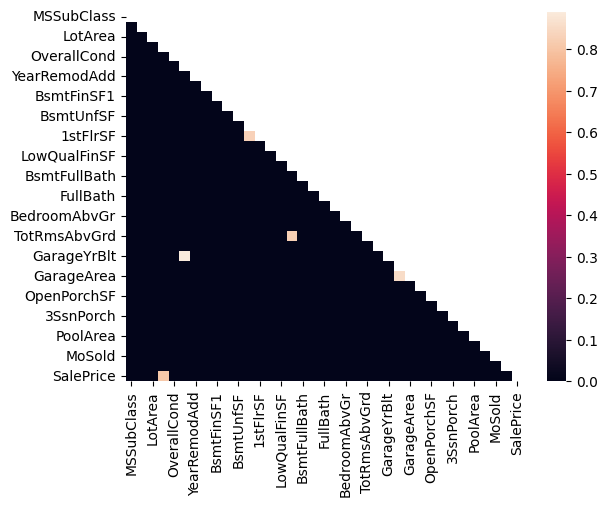

In [7]:
sns.heatmap(df_triangle ,mask=mask) #